<a href="https://colab.research.google.com/github/rahiakela/data-science-research-and-practice/blob/main/case-study-5--predicting-future-friendships/01_graph_theory_and_network_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##An introduction to graph theory and network analysis

Network theory is the study of connections between objects. These objects can be
anything: 

* people connected by relationships, 
* web pages connected by web links, or
* cities connected by roads. 

A collection of objects and their dispersed connections is
called either a network or a graph, depending on whom you ask. 

Engineers prefer to use the term network, while mathematicians prefer graph.

Graphs are simple abstractions that
capture the complexity of our entangled, interconnected world. 

Properties of graphs
remain surprisingly consistent across systems in society and nature.

Graph theory is a
framework for mathematically tracking these consistencies. It combines ideas from diverse branches of mathematics, including probability theory and matrix analysis.

These ideas can be used to gain useful real-world insights ranging from:

* search engine page rankings 
* social circle clustering

So some knowledge of graph theory is indispensable to doing good data science.

##Setup

In [ ]:
!pip install networkx

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import re
import glob
import time
import numpy as np
import pandas as pd

import networkx as nx

from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize

from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML

##Ranking websites by popularity

Suppose you wish to estimate the most popular data science website using
data that is publicly available. This precludes privately tracked traffic data. 

What should you do? 

Network theory offers us a simple way of ranking websites based on
their public links.

To see how, let’s build a simple network composed of two data science
websites: a NumPy tutorial and a SciPy tutorial. 

In graph theory, these websites
are referred to as the nodes in the graph.

Nodes are network points that can form connections
with each other; these connections are called edges.

In [4]:
# Defining a node list
nodes = ["Numpy", "SciPy"]

In [5]:
# Defining an edge list
edges = [(1, 0)]  # pointing SciPy to Numpy

In [6]:
# Checking for the existence of an edge
def edge_exists(i, j):
  return (i, j) in edges

assert edge_exists(1, 0)
assert not edge_exists(0, 1)

In [7]:
# Tracking nodes and edges using a matrix
adjacency_matrix = np.zeros((len(nodes), len(nodes)))

for i, j in edges:
  adjacency_matrix[i][j] = 1

assert adjacency_matrix[1][0]
assert not adjacency_matrix[0][1]

print(adjacency_matrix)

[[0. 0.]
 [1. 0.]]


In [8]:
# Adding an edge to the adjacency matrix
adjacency_matrix[0][1] = 1  # pointing Numpy to SciPy
print(adjacency_matrix)

[[0. 1.]
 [1. 0.]]


Suppose we wish to expand our website network by adding two more data science sites
that discuss Pandas and Matplotlib. 

Adding them will increase our node count from
two to four, so we need to expand the adjacency matrix dimensions from two-by-two to four-by-four.

Unfortunately, in NumPy, it’s hard to resize a matrix
while maintaining all existing matrix values—NumPy is not designed to easily handle
growing arrays whose shape is constantly expanding.

Therefore,
NumPy is not the best tool for analyzing expanding networks. 

What should we do?

We need to switch to a different Python library. NetworkX is an external library that
allows for easy network modification. 

It also provides additional useful features, including
network visualization.



##NetworkX

In [9]:
# Initializing a directed graph object
G = nx.DiGraph()

In [10]:
# Adding a single node to a graph object
G.add_node(0)
print(nx.to_numpy_array(G))

[[0.]]


In [11]:
# Adding an attribute to an existing node
def print_node_attributes():
  for i in G.nodes:
    print(f"The attribute dictionary at node {i} is {G.nodes[i]}")

In [12]:
print_node_attributes()

G.nodes[0]["webpage"] = "NumPy"
print(f"\nWe've added a webpage to node 0")
print_node_attributes()

The attribute dictionary at node 0 is {}

We've added a webpage to node 0
The attribute dictionary at node 0 is {'webpage': 'NumPy'}


In [13]:
# Adding a node with an attribute
G.add_node(1, webpage="SciPy")
print_node_attributes()

The attribute dictionary at node 0 is {'webpage': 'NumPy'}
The attribute dictionary at node 1 is {'webpage': 'SciPy'}


In [14]:
# Outputting nodes together with their attributes
print(G.nodes(data=True))

[(0, {'webpage': 'NumPy'}), (1, {'webpage': 'SciPy'})]


In [15]:
# Adding a single edge to a graph object
G.add_edge(1, 0)
print(nx.to_numpy_array(G))

[[0. 0.]
 [1. 0.]]


From the printed adjacency matrix, we can observe an edge going from Node 1 to
Node 0. 

Unfortunately, our matrix printouts will grow cumbersome as other nodes are
added.

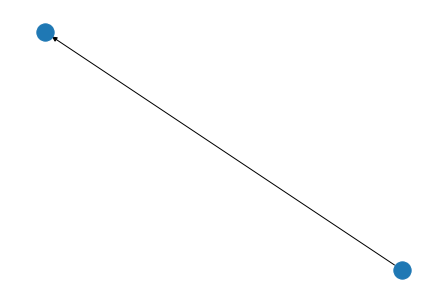

In [16]:
# Plotting a graph object
np.random.seed(0)

nx.draw(G)
plt.show()

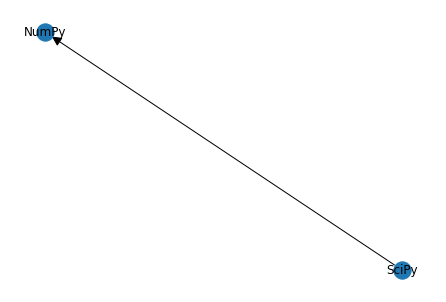

In [17]:
# Tweaking the graph visualization
np.random.seed(0)

labels = {i: G.nodes[i]["webpage"] for i in G.nodes}
nx.draw(G, labels=labels, arrowsize=20)
plt.show()

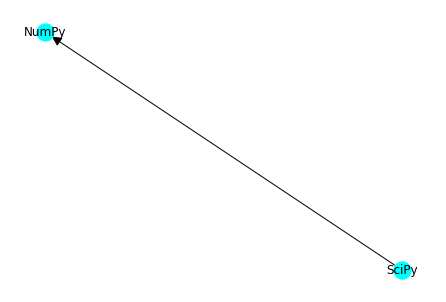

In [18]:
# Altering the node color
np.random.seed(0)

nx.draw(G, labels=labels, arrowsize=20, node_color="cyan")
plt.show()

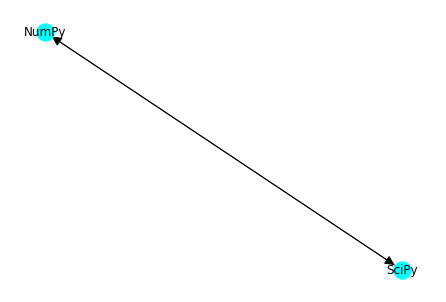

In [19]:
# Adding a back-link between web pages
np.random.seed(0)

G.add_edge(0, 1)
nx.draw(G, labels=labels, arrowsize=20, node_color="cyan")
plt.show()